# About the Project:
Click-through rate (CTR) is a very important metric for evaluating ad performance of online advertising. Ads Click Through Rate is the ratio of how many users clicked on an ad over total number of users viewed that ad. So Ad click prediction help companies in finding the best ad for their target audience. In this project, our task is to predict whether the user will click on the ad or not. We need to train a Machine Learning model to find relationships between the independent variables of all the users who click on ads. 

## About the dataset:
Below are all the features in the dataset:
- Daily Time Spent on Site: the daily timespan of the user on the website;
- Age: the age of the user;
- Area Income: the average income in the area of the user;
- Daily Internet Usage: the daily internet usage of the user;
- Ad Topic Line: the title of the ad;
- City: the city of the user;
- Gender: the gender of the user;
- Country: the country of the user;
- Timestamp: the time when the user visited the website;
- Clicked on Ad: 1 if the user clicked on the ad, otherwise 0;



### Load libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [ ]:
data = pd.read_csv("ad_10000records.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


### Data Exploration

There are 10000 observations with 10 columns including target column, among there are 5 categorical variables. There are no missing values in the data. Next we can check if data is balance or imbalance.

In [ ]:
print(data.shape)
print(data.info())
print(data.isnull().sum())

(10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB
None
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
C

In [ ]:
data['Clicked on Ad'].value_counts()

0    5083
1    4917
Name: Clicked on Ad, dtype: int64

Good news is that the 2 classes (Clicked vs Not Clicked) are approximately equal. For now, I will leave the 'Ad Topic Line', 'City', 'Country' columns out. 

In [ ]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
#pd.set_option('display.max_rows', None)
data["Ad Topic Line"].value_counts()

Cloned explicit middleware                 344
Streamlined homogeneous analyzer           212
Business-focused transitional solution     207
Sharable reciprocal project                187
Intuitive exuding service-desk             173
                                          ... 
Ergonomic neutral portal                     1
Implemented uniform synergy                  1
Visionary multi-tasking alliance             1
Inverse zero tolerance customer loyalty      1
Reactive interactive protocol                1
Name: Ad Topic Line, Length: 559, dtype: int64

Since the values of Clicked on Ad column contain 0 and 1. I will transform these values to No and Yes.

In [ ]:
#data["Clicked on Ad"] = data["Clicked on Ad"].map({0: "No", 
                              # 1: "Yes"})

 Now, let's plot the click-through rate based on the time spent by the users on the website.

Text(0.5, 1.0, 'Click Through Rate based on Daily Time Spent on Site')

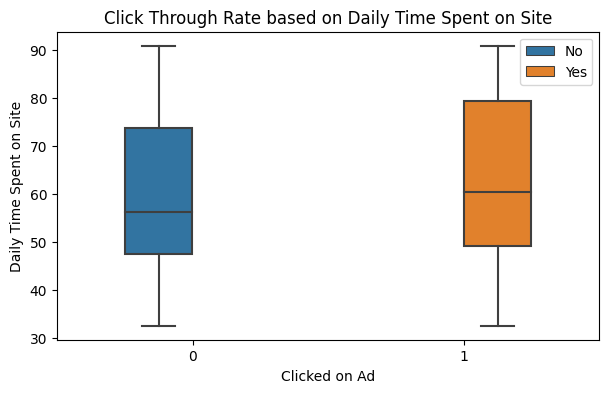

In [ ]:
plt.figure(figsize=(7,4))
ax = sns.boxplot(data = data, x = 'Clicked on Ad', y = 'Daily Time Spent on Site', hue = 'Clicked on Ad', width=0.5)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Yes"])

plt.title("Click Through Rate based on Daily Time Spent on Site")

The plot above shows that the more people spent time on site the more chance they click on ads. Next let's examine the click through rate based on Age of users. 

Text(0.5, 1.0, "Click Through Rate based on User's Age")

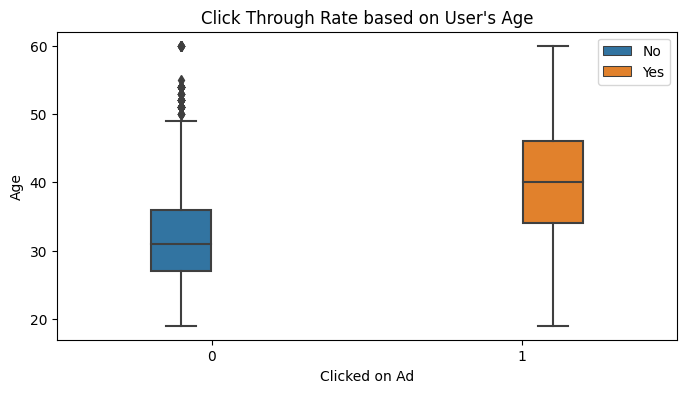

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(data = data, x = 'Clicked on Ad', y = 'Age', hue = "Clicked on Ad", width=0.4)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Yes"])
plt.title("Click Through Rate based on User's Age")

The plot shows that users around 40 years old click more on ads than younger user, who are around 27-36 years old. Next, let's analyze click through rate based on Area Income.

Text(0.5, 1.0, 'Click Through Rate based on Area Income')

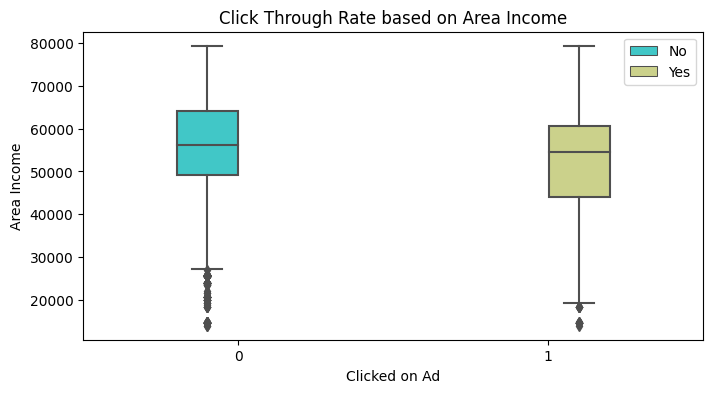

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(data = data, x = 'Clicked on Ad', y = 'Area Income', hue = 'Clicked on Ad', width=0.4, palette='rainbow')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Yes"])
plt.title("Click Through Rate based on Area Income")

The Area Income doesn't impact much on Clicked on Ad, but there are still some difference. People with lower income tend to click on ads more.

Text(0.5, 1.0, 'Click Through Rate based on Daily Internet Usage')

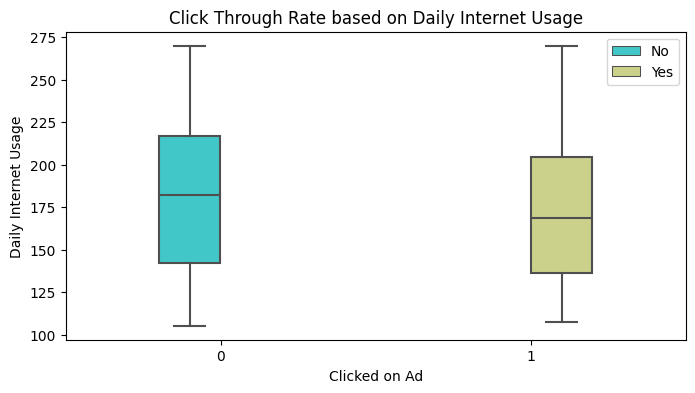

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(data = data, x = 'Clicked on Ad', y = 'Daily Internet Usage', hue = 'Clicked on Ad', width=0.4, palette='rainbow')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Yes"])
plt.title("Click Through Rate based on Daily Internet Usage")

There are only little bit differences between two groups. Users with higer internet usage tend to click less on ads. Finally we will examine if the gender affect on ad click. We can use bar plot from crosstab result.

Clicked on Ad     0     1
Gender                   
Female         2609  2767
Male           2474  2150


<Axes: xlabel='Gender'>

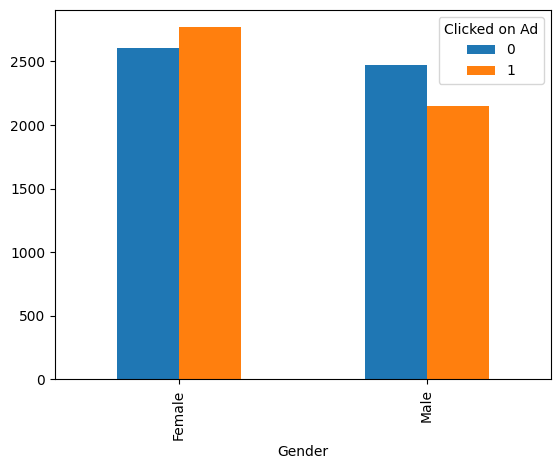

In [ ]:
CrosstabResult=pd.crosstab(index=data['Gender'],columns=data['Clicked on Ad'])
print(CrosstabResult)
CrosstabResult.plot.bar()

We see that there are not much different between the two groups. Nevertheless, female tends to click on ad more than male.

For the Timestamp variable, I will extract hour to see if click through rate depend on time of the day or not.


In [ ]:
import datetime as dt
Timestamp = pd.to_datetime(data.Timestamp)
data['hour'] = Timestamp.dt.hour
data['DayofWeek'] = Timestamp.dt.day_of_week

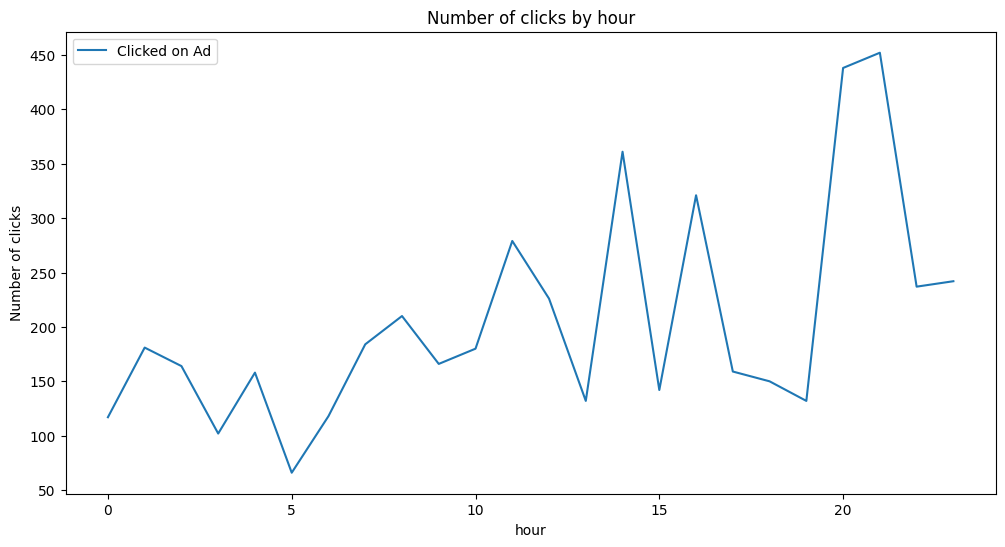

In [ ]:
data.groupby('hour').agg({'Clicked on Ad':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

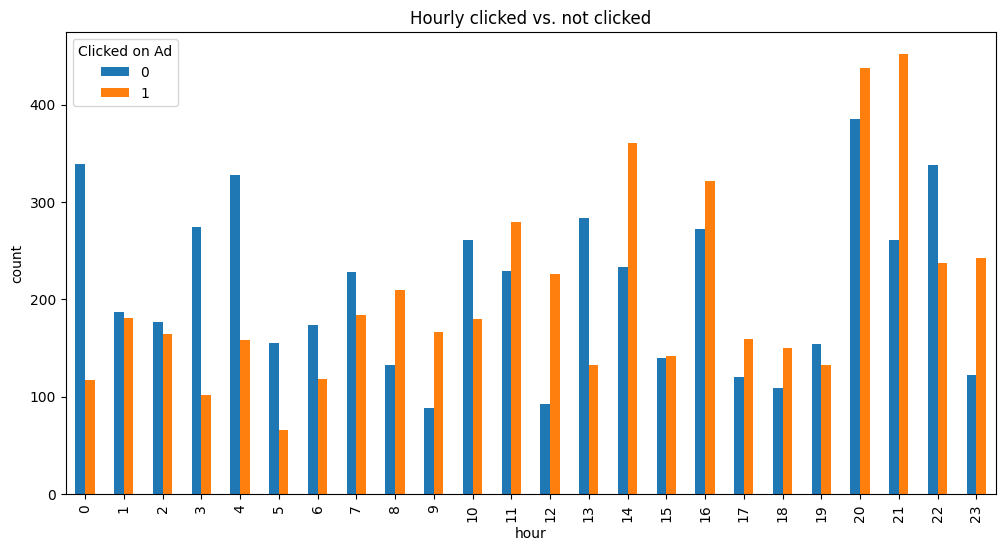

In [ ]:
data.groupby(['hour', 'Clicked on Ad']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly clicked vs. not clicked');

We see that in general, the highest number of clicks happened at 8pm and 9pm. The lowest number of clicks is at 5am. 

Finally, we can check if there are correlation between variables. 

<ipython-input-19-dc7412b9f56b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

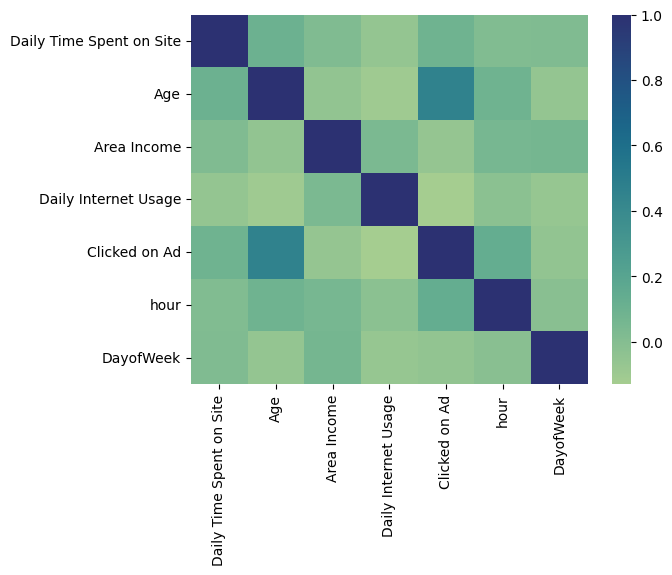

In [ ]:
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
sns.heatmap(correlation, cmap="crest")

[link text](https:// [link text](https://))## Model Selection:
1. LogisticRegression
2. RandomForest
3. Xgboost

Since in our data set, there are only variable 'Gender' is categorical. And as we see from above plot, there are not much different between Male and Female on clicked on ad. Also, our problem is binary classification, I will try to model using LogisticRegression first, to see how things doing. 

In [ ]:
X1 = data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'hour', 'DayofWeek']]
y1 = data['Clicked on Ad']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 10)

Since Logistic regression is not a tree based model, we should first scale our data so that all the features have the same scale. We will use StandardScaler from sklearn to standardize the features by removing the mean and scaling to unit variance.

In [ ]:
std = StandardScaler()
scaled = std.fit_transform(X1)

In [ ]:
X_scaled_train, X_scaled_test, y1_train, y1_test = train_test_split(scaled, y1, random_state = 10)

In [ ]:
LRs = LogisticRegression(random_state=0).fit(X_scaled_train, y1_train)
y_pred = LRs.predict(X_scaled_test)
accuracy = accuracy_score(y1_test, y_pred)
roc_auc = roc_auc_score(y1_test, y_pred)
print(f"Model accuracy score: {accuracy}")
print(f"Model auc score: {roc_auc}")

Model accuracy score: 0.7148
Model auc score: 0.7141521707951728


The accuracy score from logistic regression model is 71.5%. The auc score is 71.4%, which is ok for now. Let's try to train the data with RandomForest model and check the accuracy and roc_auc score.

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X1_train, y1_train.ravel())
y_pred = rf_clf.predict(X1_test)
f1_score = metrics.f1_score(y1_test, y_pred, average = 'micro')
accuracy = accuracy_score(y1_test, y_pred)
roc_auc = roc_auc_score(y1_test, y_pred)
print(f"Model f1 score: {f1_score}")
print(f"Model accuracy score: {accuracy}")
print(f"Model auc score: {roc_auc}")

Model f1 score: 0.8056000000000001
Model accuracy score: 0.8056
Model auc score: 0.805349386358514


The accuracy and roc_auc score are pretty good compare to our previous model. Next we can fine tune the model using RandomizedSearchCV. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100, 200, 300, 500, 1000]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 50, 100]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 500, 1000], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 20, 30, 50, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=0, random_state=42)
# Fit the random search model
rf_random.fit(X1_train, y1_train.ravel())

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 50, 100],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   random_state=42)

In [51]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [53]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
roc_auc = roc_auc_score(y1_test, y_pred)
print(f"Model accuracy score: {accuracy}")
print(f"Model auc score: {roc_auc}")

Model accuracy score: 0.8148
Model auc score: 0.8146948695883787


We achieve an improvement in accuracy and auc score 0.9% from tuning the model. This could be a significant benefit depends on the application. 
Below is the plot of confusion matrix for true and predicted labels. We accurately predicted of 1046 customers who did not click on Ads and 991 users who did click on Ads.


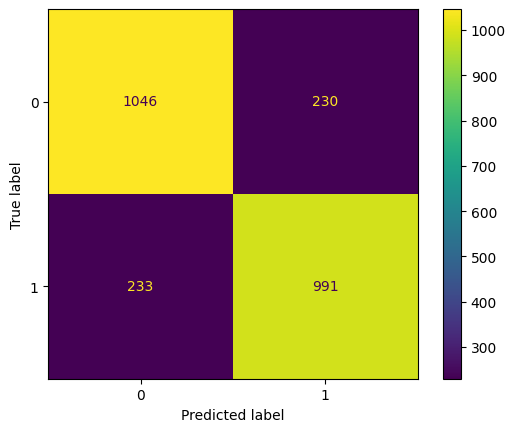

In [58]:
confusion_matrix(y1_test, y_pred)
ConfusionMatrixDisplay.from_estimator(best_random, X1_test, y1_test)
plt.show()

Finaly, we will train our data using Xgboost. 

In [66]:
model = XGBClassifier()
model.fit(X1_train, y1_train)
y_pred = model.predict(X1_test)
f1_score = metrics.f1_score(y1_test, y_pred, average = 'micro')
accuracy = accuracy_score(y1_test, y_pred)
roc_auc = roc_auc_score(y1_test, y_pred)
print(f"Model accuracy score: {accuracy}")
print(f"Model auc score: {roc_auc}")

Model accuracy score: 0.832
Model auc score: 0.8319272850205913


The accuracy score from Xgboost model is 1.5% higher than the accuracy from RandomForest model. Next we fine tune xgboost model using RandomSearchCV.

In [106]:
params = {
 'n_estimators': [100, 200, 300, 400, 500],
 'learning_rate' : [0.005, 0.01, 0.05,0.10,0.15,0.20],
 'max_depth' : [ 3, 4, 5, 6, 8, 10],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [0.4, 0.5, 0.7, 0.8],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [108]:
rs_model=RandomizedSearchCV(model,param_distributions=params,n_iter=50,
                             scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X1_train, y1_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.4, 0.5, 0.7, 0.8],
                                        'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1, 0.15, 0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc', verbose=3)

In [109]:
rs_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [111]:
xg_best_random = rs_model.best_estimator_
y_pred = xg_best_random.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
roc_auc = roc_auc_score(y1_test, y_pred)
print(f"Model accuracy score: {accuracy}")
print(f"Model auc score: {roc_auc}")

Model accuracy score: 0.8416
Model auc score: 0.8413316737353249


We've achieved the improvement of 1% in accuracy. This is a greatest achievement we've gainned so far. Next I will plot the confusion matrix of the result:

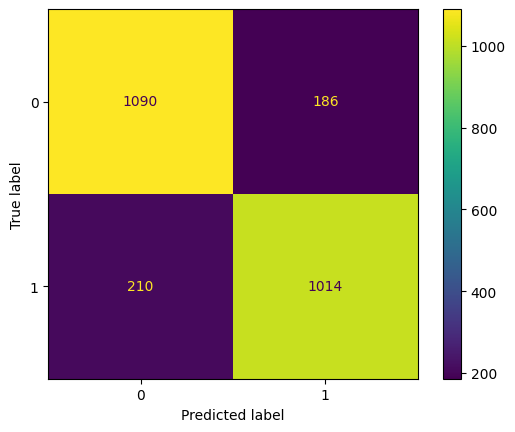

In [113]:
ConfusionMatrixDisplay.from_estimator(xg_best_random, X1_test, y1_test)
plt.show()

With finetuning the xgboost model, we correctly predicted 1090 users who didn't click on Ads and 1014 users who did click on Ads, which is 44 and 23 more correctly predicted of users who didn't and did click on Ads respective from Random Forest model.

## Further notice:
- I've also tried with Multi-layer Perceptron neural network classifier and the result is not very good. The accuracy is around 65%. 
- I also tried Recursive feature 
elimination for features selection but because we don't have many features so the result wasn't improved at all. 


